In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../')


In [3]:
from tqdm import tqdm
import json
from pathlib import Path
from mlflood.conf import PATH_GENERATED
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mlflood.preprocess import build_dataset
import os


In [5]:
# catchment_num = "toy"
# catchment_num = "709_new"

# catchment_num = "Luzern"

# catchment_num = "744"
# catchment_num = "Luzern"
# catchment_num = "709_0threshold"
catchment_num="709_long"

In [10]:
# rename 0 WD files if necessary
log_dir = Path("/scratch/tdonauer/tabea_mt/data/709_long/")

dirs = []
for d in log_dir.glob("*r*"):
    dir = str(d)
    dirs.append(dir)
for dir in dirs:
    os.chdir(dir)
    for filename in os.listdir('.'):
        if '_0.npy' in filename:
            new = filename.split("_0.np")[-2]
            os.rename(filename, new + '_WDraster_0.npy')


# Creating the h5 files

In [12]:
build_dataset(catchment_num)

100%|██████████| 3/3 [01:02<00:00, 20.85s/it]


# Analysing the dataset
When I do this with catchment 709, the kernel dies because the dataset is too large

In [7]:
name = "test"
with h5py.File(PATH_GENERATED / Path(catchment_num + "-" + name+".h5"), 'r') as f:
    dem = f["dem"][()]
    mask = f["mask"][()]
    event_name = f["event_name"][()]
    timesteps = []
    waterdepth = []
    rainfall_events = []
    for k in filter(lambda x: "timesteps"==x[:9],  sorted(f.keys())):
        timesteps.append(f[k][()])
    for k in filter(lambda x: "waterdepth"==x[:10],  sorted(f.keys())):
        waterdepth.append(f[k][()])
    for k in filter(lambda x: "rainfall_events"==x[:15],  sorted(f.keys())):
        rainfall_events.append(f[k][()])


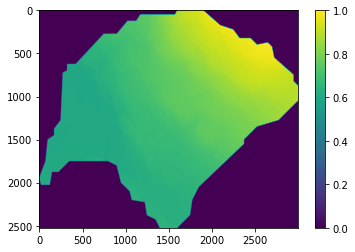

In [13]:
name = "train"
with h5py.File(PATH_GENERATED / Path(catchment_num + "-" + name+".h5"), 'r') as f:
#with h5py.File(PATH_GENERATED / Path("S_02_real.h5"), 'r') as f:
    dem = f["dem"][()]
    mask = f["mask"][()]

fig,ax=plt.subplots()
import matplotlib.patches as patches
plt.imshow(dem)
plt.colorbar()
# Create a Rectangle patch
rect = patches.Rectangle((2500, 1500), 500, 500, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
#ax.add_patch(rect)


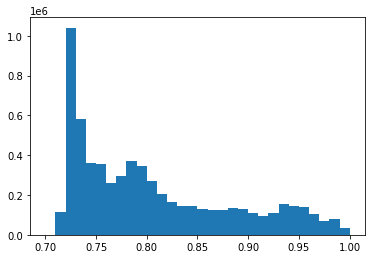

In [43]:
dem=dem.flatten()
plt.hist(dem, bins=np.arange(0.7, 1, 0.01))
plt.show()

Text(0, 0.5, 'Rainfall (mm)')

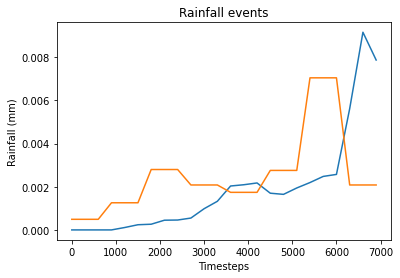

In [7]:
k = 24
for t, re in zip(timesteps, rainfall_events):
    plt.plot(t[:k], re[:k])
plt.title("Rainfall events")
plt.xlabel('Timesteps')
plt.ylabel('Rainfall (mm)')

In [10]:
def print_stat(x):
    print(np.min(x), np.max(x), np.mean(x), np.std(x))

In [11]:
waterdepth = [w[:,mask.astype(bool)] for w in waterdepth]

In [12]:
print_stat(np.concatenate(waterdepth))

0.0 0.374139 0.01979655 0.048295315


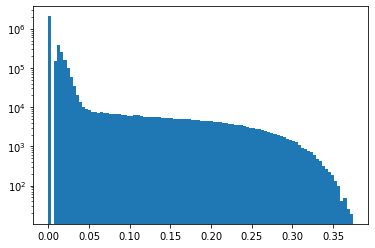

In [13]:
plt.hist(np.concatenate(waterdepth).flatten(), 100);
plt.yscale("log")

In [14]:
diff_waterdepth = [np.diff(w, axis=0) for w in waterdepth]

In [15]:
print_stat(np.concatenate(diff_waterdepth))

-0.013382 0.069492996 0.0011157665 0.0056362725


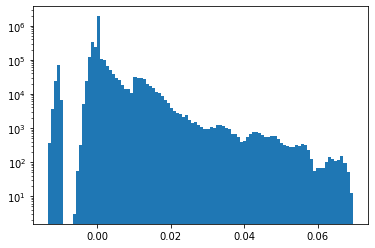

In [16]:
plt.hist(np.concatenate(diff_waterdepth).flatten(), 100);
plt.yscale("log")

In [17]:
[(np.mean(w[-1,:]) - np.mean(w[0,:]))/(w.shape[0] -1) for w in waterdepth]

[0.0008590327731023232,
 0.0011936450997988384,
 0.001403805644561847,
 0.0006069519634669026,
 0.0010322945502897103,
 0.001194293222700556,
 0.001405391376465559,
 0.0008563227796306213,
 0.0010290256856630247,
 0.0015769012582798798]